### Fine-tuning ML4SE models for specific projects 
#### Jiri Gesi (University of California, Irvine)


##### Motivation: 

In the field of Machine Learning on source code, most papers compare average performance of models on datasets comprising tens to thousands repositories. However, in real-world applications, we are more interested in the model's performance on a certain small group of repositories, rather than the whole generality. The goal of this project is to research whether we can significantly improve the model's performance on several chosen repositories, even if the average on a large dataset drops. 

### Task

In this task, we predict Java's method's name give its body. We use the Java-large dataset. We measure precision, recall, and F1 score over the target sequence, case insensitive.  

### Pre-Exsiting resource:
* Pre-trained code2seq model for Java-large corpus
* Java-large corpus (training projects: 9000, testing projects: 306)

### Data collection
Before, the authors of the paper Code2seq run the trained model on all testing projects at the same time. But we need to run the pre-trained model on each testing repo this time.

To remove the Neural Network variance issue, I run the model on each project two times and use the average results to analyze. 

Because of the large size of the datasets and model, I conducted the code summarization prediction task on another desktop with the below procedure:

1. Run preprocess script to process projects for testing Java projects.
2. Evaluate the pretrained java-large-model/model_iter52.release model on processed data and store the precision, recall, and F1 score into 'large_results.csv' file.
3. Calculate the average value of precision, recall, and F1 score for each project. 

### Data analysis

First, import result data. The data has prediction results for 306 projects. The first column is each project name. The last three columns are Precision, Recall and F1 results for the projects.

In [1]:
import pandas as pd
data=pd.read_csv('large_results.csv')

print('data shape:', data.shape)
data.head()

data shape: (306, 4)


,project,Precision,Recall,F1
0,blablacar__flaggr-android.test.c2s,0.557143,0.513158,0.534247
1,58code__Oceanus.test.c2s,0.734322,0.710039,0.721977
2,ac-pm__SSLUnpinning_Xposed.test.c2s,0.858696,0.831579,0.844920
3,adamkewley__jobson.test.c2s,0.598057,0.339071,0.432777
4,afollestad__photo-affix.test.c2s,0.749141,0.770318,0.759582


* Calculate the mean value for all projects' Precision, Recall and F1

In [2]:
print('Precision Mean: ',data['Precision'].mean())
print('Recall Mean: ',data['Recall'].mean())
print('F1 Mean: ',data['F1'].mean())

Precision Mean:  0.6678242733954243
Recall Mean:  0.6276356875588235
F1 Mean:  0.6448328880261438


### We will only use F1 score to analyze here

Calculate the F1 scores two times standard deviation, upper and lower boundaries. We will use upper and lower boundaries to identify the projects that significantly deviate from the average.

In [3]:
f1_mean = data['F1'].mean()
f1_std = data['F1'].std()
upper_2std = f1_mean + 2*f1_std
lower_2td = f1_mean - 2*f1_std
print('f1_mean: ',f1_mean)
print('f1_std: ',f1_std)
print('upper_2std: ',upper_2std)
print('lower_2td: ',lower_2td)

f1_mean:  0.6448328880261438
f1_std:  0.14854363326393746
upper_2std:  0.9419201545540188
lower_2td:  0.3477456214982689


### Data Visulization

In the below two charts, the first one is showing one standard deviation, and the second one is showing two standard deviation.

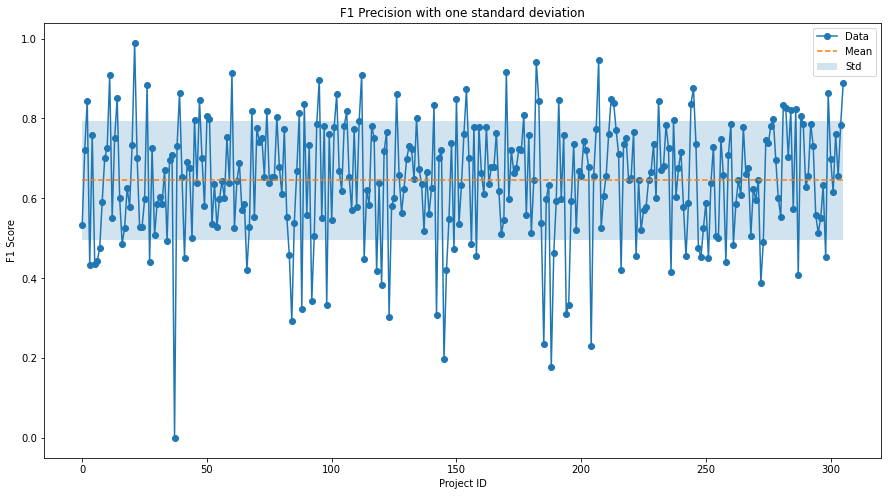

In [4]:
from matplotlib import pyplot as plt
import numpy as np

fig,ax = plt.subplots(figsize=(15,8))
x_axis = range(306)
y_axis = list(data['F1'])
mean_line = [f1_mean] * 306

# Plot the data
data_line = ax.plot(x_axis,y_axis, label='Data', marker='o')
# Plot the average line
mean_line = ax.plot(x_axis,mean_line, label='Mean', linestyle='--')

# plot the std range
ax.fill_between(x_axis, f1_mean - f1_std, f1_mean + f1_std, alpha=0.2, label='Std')
ax.set_title('F1 Precision with one standard deviation')
ax.set_xlabel('Project ID')
ax.set_ylabel('F1 Score')
ax.legend(loc="upper right")
plt.show()

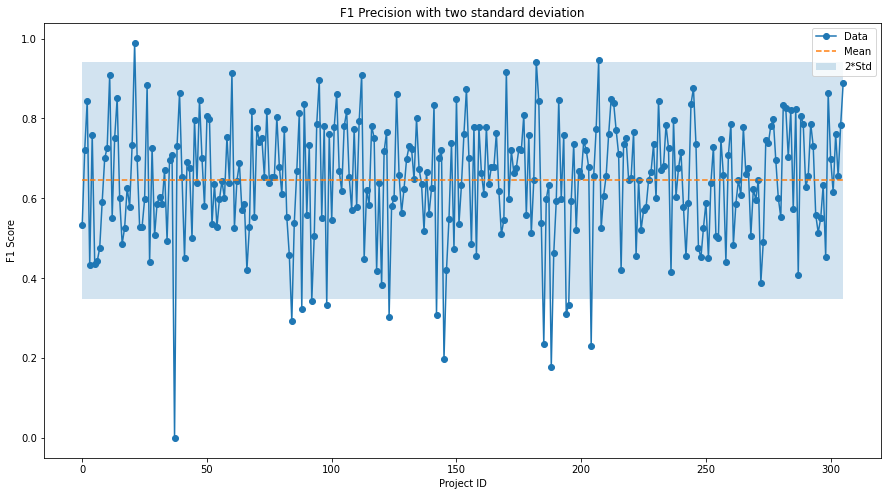

In [5]:
fig,ax = plt.subplots(figsize=(15,8))
x_axis = range(306)
y_axis = list(data['F1'])
mean_line = [f1_mean] * 306

# Plot the data
data_line = ax.plot(x_axis,y_axis, label='Data', marker='o')
# Plot the average line
mean_line = ax.plot(x_axis,mean_line, label='Mean', linestyle='--')

# plot the std range
ax.fill_between(x_axis, f1_mean - 2*f1_std, f1_mean + 2*f1_std, alpha=0.2, label='2*Std')
ax.set_title('F1 Precision with two standard deviation')
ax.set_xlabel('Project ID')
ax.set_ylabel('F1 Score')
ax.legend(loc="upper right")
plt.show()

### Visulize F1 socre ditribution

F1
(-1.0, 0.0]     1
(0.0, 0.1]      0
(0.1, 0.2]      2
(0.2, 0.3]      3
(0.3, 0.4]      9
(0.4, 0.5]     30
(0.5, 0.6]     67
(0.6, 0.7]     77
(0.7, 0.8]     77
(0.8, 0.9]     33
(0.9, 1.0]      7
Name: F1, dtype: int64


<AxesSubplot:title={'center':'F1 Score Distribution for all testing proejcts'}, xlabel='F1 Score range', ylabel='Frequency'>

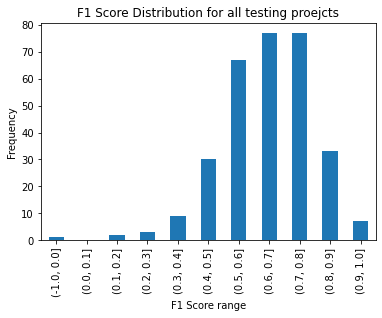

In [6]:
ranges = [-1, 0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
distribution = data['F1'].groupby(pd.cut(data['F1'], ranges)).count()
print(distribution)
distribution.plot.bar(xlabel = "F1 Score range", ylabel="Frequency", title="F1 Score Distribution for all testing proejcts")

From above chart, among total 306 projects:
* most of project's F1 score is in range (0.4, 0.9]. 
* One project's F1 score is 0. 
* 12 projects' F1 score is in (0.1, 0.4]
* three projects' F1 score is in (0.9, 1]

### Questions: 
From the distribution, I come up with several questions:

* Q1: How many projects deviate from the average significantly?
* Q2: Which projects have a high F1 score? Why is their F1 Score so high? 
* Q3: Which projects have a low F1 score? Why is their F1 Score so low? What we can do to improve these projects' performances.


#### Q1: How many projects deviates from the average significantly?

We consider the projects' results value that is out of two standard deviation to mean F1 value as significantly deviating from the average. The average F1 score is 0.6448, the upper level is 0.9419 and the lower level is 0.3477. 

1. There are 13 projects' F1 score smaller than 0.3477 and one project got 0 for multiple prediction.

2. There are three projects' F1 score bigger than 0.9419 and the highest F1 score is 0.9896



#### Q2: Which projects have very high F1 score? Why are their F1 score so high?

The three tested projects have high F1 score that bigger than 0.9419 are: 
* "arsan-official__collapsing-toolbar"(F1 = 0.9795)
* "paveldudka__TranslateFragment"(F1 = 0.9459) 
* "Modificator__water-wave-progress" (F1 = 0.9420).

The original method names for these three projects are very representative to code and clear. Such as some below examples: 

>Original: get|letter , predicted 1st: get|letter

>Original: set|letter , predicted 1st: set|letter

>Original: get|name , predicted 1st: get|name

>Original: set|name , predicted 1st: set|name

>Original: get|desc , predicted 1st: get|desc

>Original: set|desc , predicted 1st: set|desc

Also, These method should happened a lots in training data, which also means these high performance projects are well represented in training data. 

#### Q3: Which projects have very low F1 score? Why are their F1 Score so low? What we can do to improve these proejcts performance.

There are 13 projects' F1 score are significantly lower than mean F1 value of all 306 projects. The project "burningcl__wechat_jump_hack" prediction F1 score is always 0(I run five times to make sure). 

The other 12 projects are: 
* "f2prateek__dart" (F1 = 0.2924), 
* "fishercoder1534__Leetcode" (F1 = 0.3240), 
* "georgewfraser__vscode-javac" (F1 = 0.3425), 
* "glung__redux-java" (F1 = 0.3580), 
* "jamesdbloom__mockserver" (F1 = 0.4121), 
* "jmockit__jmockit1" (F1 = 0.3091), 
* "jopt-simple__jopt-simple" (F1 = 0.1968), 
* "mrwilson__byte-monkey (F1 = 0.2346)", 
* "mwanji__toml4j" (F1 = 0.1778), 
* "novoda__merlin" (F1 = 0.3114), 
* "nurkiewicz__rxjava-book-examples" (F1 = 0.3335), 
* "parrt__simple-virtual-machine" (F1 = 0.2307).

Their method names are not as clear as the top F1 score projects. Here are some example (Original is the name used in Java project, predicted 1st is th 1st position of the perdicted code summary): 

>Original: load , predicted 1st: read|image

>Original: match , predicted 1st: is|in|range

>Original: find , predicted 1st: get|max|y

>Original: main , predicted 1st: print

>Original: find , predicted 1st: get|rgb

>Original: build|array , predicted 1st: get

>Original: find , predicted 1st: get

>Original: build|array , predicted 1st: get

>Original: main , predicted 1st: run

>Original: main , predicted 1st: find|next|center

>Original: find , predicted 1st: process

>Original: build|array , predicted 1st: get

>Original: main , predicted 1st: paint

There are multiple "find" methods in different class, but all their names are same. Similar method name for "build", "main". 

###### example:

```java
public class ImgLoader {

    public static BufferedImage load(String path) throws IOException {
        BufferedImage image = null;
        InputStream is = null;
        try {
            is = new BufferedInputStream(new FileInputStream(path));
            image = ImageIO.read(is);
        } finally {
            if (is != null) {
                is.close();
            }
        }
        return image;
    }
}
``` 

In this example, the project named class as "ImgLoader", and the method as "load". Our result is "read|image":
> Original: load , predicted 1st: read|image

if we compare "ImgLoader|load" with "read|image", the distance should be much closer than the "load" and "read|image". 

#### How to improve these 13 projects F1 score?

1. In the data preprocessing stage, we should separate data into two different groups. In the first group, the project should not have lots of duplicate method names. In this kind of project, its method name usually summarizes the code clearly. Another group is the one that has more duplicate method names than others. This kind of project's method name usually can not summarize the code well

2. For the first group of projects, the trained model in code2seq should have a better result. In these 306 projects, I manually identified 12 poor performance projects and their method name have high duplication, which also means the original method name is not understandable. After removing these 12 projects, the mean F1 score increased to 0.6734 from 0.6448. 

3. For the second group, the original method name could be the combination of class name and method name, which could make the target name more meaningful. Then, we can train a new model based on this group of data. 

4. Another approach to improve the F1 score for code summary is that we can categorize the Java proejcts based on their task. So that the Attention weights for Neural network may performance better. 